In [1]:
# import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# loading data
filepath = 'D:\\netflix_titles\\netflix_titles.csv'
netflix_data = pd.read_csv(filepath)
netflix_data.head(10)

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   
5      s6  TV Show     46        Serdar Akar   
6      s7    Movie    122    Yasir Al Yasiri   
7      s8    Movie    187     Kevin Reynolds   
8      s9    Movie    706      Shravan Kumar   
9     s10    Movie   1920       Vikram Bhatt   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   
5  Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...         Turkey   
6  Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...          Egypt   
7  Samuel L. Jackson, John Heard, Kelly Rowan, Cl...  United States   
8  Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...          India   
9  Rajneesh Duggal, Adah Sharma, Indraneil Sengup...          India   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   
5       July 1, 2017          2016  TV-MA   1 Season   
6       June 1, 2020          2019  TV-MA     95 min   
7   November 1, 2019          1997      R    119 min   
8      April 1, 2019          2019  TV-14    118 min   
9  December 15, 2017          2008  TV-MA    143 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   
5    International TV Shows, TV Dramas, TV Mysteries   
6                Horror Movies, International Movies   
7                                             Dramas   
8                Horror Movies, International Movies   
9     Horror Movies, International Movies, Thrillers   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...  
5  A genetics professor experiments with a treatm...  
6  After an awful accident, a couple admitted to ...  
7  After one of his high school students attacks ...  
8  When a doctor goes missing, his psychiatrist w...  
9  An architect and his wife move into a castle t...

In [3]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [4]:
print('shape of the data: rows : {}, features : {}'.format(netflix_data.shape[0], netflix_data.shape[1]))

shape of the data: rows : 7787, features : 12


In [5]:
netflix_data.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [6]:
for i in ['type','rating','duration']:
    print('{}: {}'.format(i,netflix_data[i].unique(),'\n'))

type: ['TV Show' 'Movie']
rating: ['TV-MA' 'R' 'PG-13' 'TV-14' 'TV-PG' 'NR' 'TV-G' 'TV-Y' nan 'TV-Y7' 'PG'
 'G' 'NC-17' 'TV-Y7-FV' 'UR']
duration: ['4 Seasons' '93 min' '78 min' '80 min' '123 min' '1 Season' '95 min'
 '119 min' '118 min' '143 min' '103 min' '89 min' '91 min' '149 min'
 '144 min' '124 min' '87 min' '110 min' '128 min' '117 min' '100 min'
 '2 Seasons' '84 min' '99 min' '90 min' '102 min' '104 min' '105 min'
 '56 min' '125 min' '81 min' '97 min' '106 min' '107 min' '109 min'
 '44 min' '75 min' '101 min' '3 Seasons' '37 min' '113 min' '114 min'
 '130 min' '94 min' '140 min' '135 min' '82 min' '70 min' '121 min'
 '92 min' '164 min' '53 min' '83 min' '116 min' '86 min' '120 min'
 '96 min' '126 min' '129 min' '77 min' '137 min' '148 min' '28 min'
 '122 min' '176 min' '85 min' '22 min' '68 min' '111 min' '29 min'
 '142 min' '168 min' '21 min' '59 min' '20 min' '98 min' '108 min'
 '76 min' '26 min' '156 min' '30 min' '57 min' '150 min' '133 min'
 '115 min' '154 min' '127 min' '

In [7]:
netflix_data[netflix_data['duration'].str.contains('Season')].shape[0]

2410

In [8]:
# replace all the missing values with most repeatable feature
netflix_data['country'].mode()[0]

'United States'

In [9]:
netflix_data['duration'].mode()

0    1 Season
dtype: object

In [10]:
cols = ['country','rating', 'date_added']
for i in cols:
    netflix_data[i] = netflix_data[i].fillna(netflix_data[i].mode()[0])
print(netflix_data.isna().sum())    

show_id            0
type               0
title              0
director        2389
cast             718
country            0
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64


In [11]:
# add month to the data
netflix_data['initial_release_month'] = netflix_data['date_added'].apply(lambda x : x.split(" ")[0])
netflix_data.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description initial_release_month  
0  In a future where the elite inhabit an island ...                August  
1  After a devastating earthquake hits Mexico Cit...              December  
2  When an army recruit is found dead, his fellow...              December  
3  In a postapocalyptic world, rag-doll robots hi...              November  
4  A brilliant group of students become card-coun...               January

In [12]:
netflix_data['initial_release_month'].unique()

array(['August', 'December', 'November', 'January', 'July', 'June',
       'April', 'October', 'May', 'March', 'September', 'February', ''],
      dtype=object)

In [13]:
# add month to the data
netflix_data['initial_release_month'] = netflix_data['initial_release_month'].replace('', netflix_data['initial_release_month'].mode()[0])

In [14]:
netflix_data['initial_release_month'].unique()

array(['August', 'December', 'November', 'January', 'July', 'June',
       'April', 'October', 'May', 'March', 'September', 'February'],
      dtype=object)

In [15]:
netflix_data['Genre'] = netflix_data['listed_in'].apply(lambda x : x.split(",")[0])

In [16]:
netflix_data.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description initial_release_month  \
0  In a future where the elite inhabit an island ...                August   
1  After a devastating earthquake hits Mexico Cit...              December   
2  When an army recruit is found dead, his fellow...              December   
3  In a postapocalyptic world, rag-doll robots hi...              November   
4  A brilliant group of students become card-coun...               January   

                    Genre  
0  International TV Shows  
1                  Dramas  
2           Horror Movies  
3      Action & Adventure  
4                  Dramas

In [17]:
Wint = ['December', 'January', 'February']
Spri = [ 'March', 'April' , 'May']
Summ = ['June', 'July' , 'August']
Autum = ['September', 'October', 'November']

def get_seasons(month):
    if month in Wint:
        return 'Winter'
    elif month in Spri:
        return 'Spring'
    elif month in Summ:
        return 'Summer'
    else:
        return 'Autumn'

In [18]:
netflix_data['Season'] = netflix_data['initial_release_month'].map(get_seasons)

In [19]:
netflix_data.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description initial_release_month  \
0  In a future where the elite inhabit an island ...                August   
1  After a devastating earthquake hits Mexico Cit...              December   
2  When an army recruit is found dead, his fellow...              December   
3  In a postapocalyptic world, rag-doll robots hi...              November   
4  A brilliant group of students become card-coun...               January   

                    Genre  Season  
0  International TV Shows  Summer  
1                  Dramas  Winter  
2           Horror Movies  Winter  
3      Action & Adventure  Autumn  
4                  Dramas  Winter

In [20]:
# split the data as TV and Movie
netflix_TV = netflix_data[netflix_data['type']=='TV Show']
netflix_Movie = netflix_data[netflix_data['type']=='Movie']

In [21]:
netflix_TV['duration'].unique()

array(['4 Seasons', '1 Season', '2 Seasons', '3 Seasons', '5 Seasons',
       '9 Seasons', '8 Seasons', '6 Seasons', '11 Seasons', '7 Seasons',
       '13 Seasons', '12 Seasons', '10 Seasons', '16 Seasons',
       '15 Seasons'], dtype=object)

In [22]:
netflix_Movie['duration'].unique()

array(['93 min', '78 min', '80 min', '123 min', '95 min', '119 min',
       '118 min', '143 min', '103 min', '89 min', '91 min', '149 min',
       '144 min', '124 min', '87 min', '110 min', '128 min', '117 min',
       '100 min', '84 min', '99 min', '90 min', '102 min', '104 min',
       '105 min', '56 min', '125 min', '81 min', '97 min', '106 min',
       '107 min', '109 min', '44 min', '75 min', '101 min', '37 min',
       '113 min', '114 min', '130 min', '94 min', '140 min', '135 min',
       '82 min', '70 min', '121 min', '92 min', '164 min', '53 min',
       '83 min', '116 min', '86 min', '120 min', '96 min', '126 min',
       '129 min', '77 min', '137 min', '148 min', '28 min', '122 min',
       '176 min', '85 min', '22 min', '68 min', '111 min', '29 min',
       '142 min', '168 min', '21 min', '59 min', '20 min', '98 min',
       '108 min', '76 min', '26 min', '156 min', '30 min', '57 min',
       '150 min', '133 min', '115 min', '154 min', '127 min', '146 min',
       '136 min'

## Analysis on TV Shows 

In [23]:
netflix_TV.head()

show_id     type   title              director  \
0       s1  TV Show      3%                   NaN   
5       s6  TV Show      46           Serdar Akar   
11     s12  TV Show    1983                   NaN   
12     s13  TV Show    1994  Diego Enrique Osorno   
16     s17  TV Show  Feb-09                   NaN   

                                                 cast                country  \
0   João Miguel, Bianca Comparato, Michel Gomes, R...                 Brazil   
5   Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...                 Turkey   
11  Robert Więckiewicz, Maciej Musiał, Michalina O...  Poland, United States   
12                                                NaN                 Mexico   
16  Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...          United States   

           date_added  release_year rating   duration  \
0     August 14, 2020          2020  TV-MA  4 Seasons   
5        July 1, 2017          2016  TV-MA   1 Season   
11  November 30, 2018          2018  TV-MA   1 Season   
12       May 17, 2019          2019  TV-MA   1 Season   
16     March 20, 2019          2018  TV-14   1 Season   

                                            listed_in  \
0   International TV Shows, TV Dramas, TV Sci-Fi &...   
5     International TV Shows, TV Dramas, TV Mysteries   
11  Crime TV Shows, International TV Shows, TV Dramas   
12  Crime TV Shows, Docuseries, International TV S...   
16                  International TV Shows, TV Dramas   

                                          description initial_release_month  \
0   In a future where the elite inhabit an island ...                August   
5   A genetics professor experiments with a treatm...                  July   
11  In this dark alt-history thriller, a naïve law...              November   
12  Archival video and new interviews examine Mexi...                   May   
16  As a psychology professor faces Alzheimer's, h...                 March   

                     Genre  Season  
0   International TV Shows  Summer  
5   International TV Shows  Summer  
11          Crime TV Shows  Autumn  
12          Crime TV Shows  Spring  
16  International TV Shows  Spring

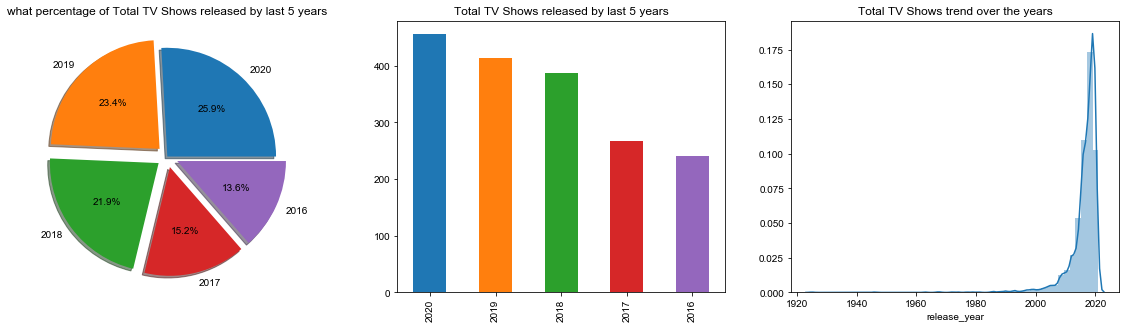

In [24]:
# Most number of TV shows by last 5 years
f,ax = plt.subplots(1,3, figsize = (20,5))
netflix_TV['release_year'].value_counts()[:5].plot.pie(ax = ax[0], explode = [0,0.1,0.1,0.1,0.1], shadow = True, autopct = '%1.1f%%')
ax[0].set_ylabel(" ")
ax[0].set_title('what percentage of Total TV Shows released by last 5 years')
netflix_TV['release_year'].value_counts()[:5].plot(kind = 'bar',color = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple'], ax = ax[1])
ax[1].set_title('Total TV Shows released by last 5 years')
# sns.countplot(x = 'release_year', data = netflix_TV['release_year'].value_counts()[:5], ax = ax[1])
sns.distplot(netflix_TV['release_year'], ax = ax[2])
ax[2].set_title('Total TV Shows trend over the years')
sns.set(style = 'darkgrid')
plt.show()

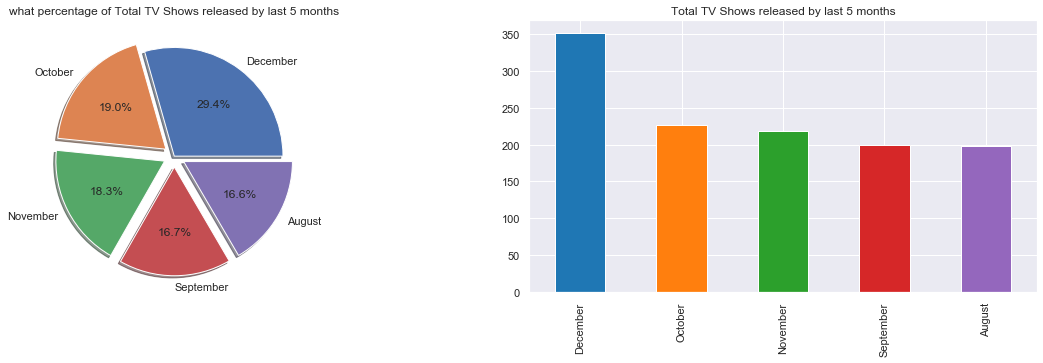

In [25]:
# Most number of TV shows by last 5 months
f,ax = plt.subplots(1,2, figsize = (20,5))
netflix_TV['initial_release_month'].value_counts()[:5].plot.pie(ax = ax[0], explode = [0,0.1,0.1,0.1,0.1], shadow = True, autopct = '%1.1f%%')
ax[0].set_ylabel(" ")
ax[0].set_title('what percentage of Total TV Shows released by last 5 months')
netflix_TV['initial_release_month'].value_counts()[:5].plot(kind = 'bar',color = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple'], ax = ax[1])
ax[1].set_title('Total TV Shows released by last 5 months')
# sns.countplot(x = 'release_year', data = netflix_TV['release_year'].value_counts()[:5], ax = ax[1])

sns.set(style = 'darkgrid')
plt.show()

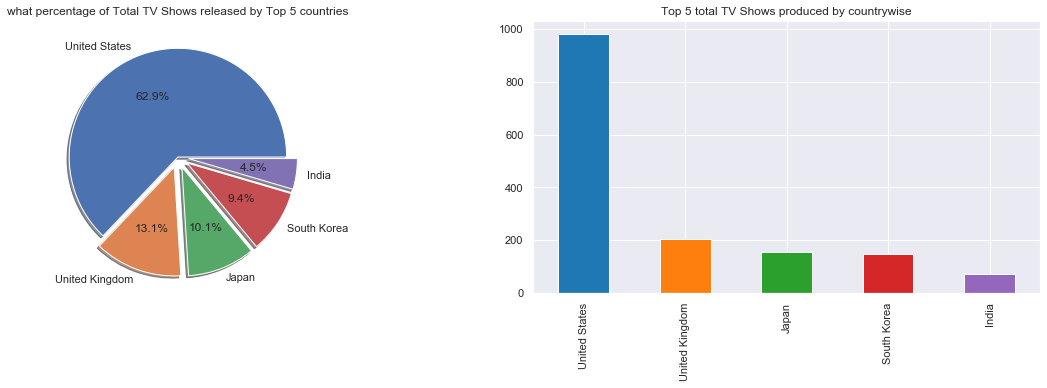

In [26]:
# Top 5 countries which produces TV Shows
f,ax = plt.subplots(1,2, figsize = (20,5))
netflix_TV['country'].value_counts()[:5].plot.pie(ax = ax[0], explode = [0,0.1,0.1,0.1,0.1], shadow = True, autopct = '%1.1f%%')
ax[0].set_ylabel(" ")
ax[0].set_title('what percentage of Total TV Shows released by Top 5 countries')
netflix_TV['country'].value_counts()[:5].plot(kind = 'bar',color = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple'], ax = ax[1])
ax[1].set_title('Top 5 total TV Shows produced by countrywise')
# sns.countplot(x = 'release_year', data = netflix_TV['release_year'].value_counts()[:5], ax = ax[1])

sns.set(style = 'darkgrid')
plt.show()

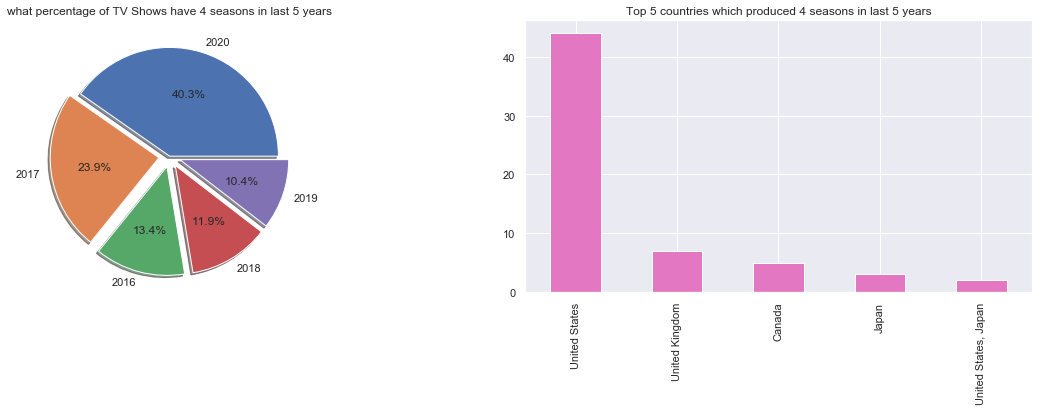

In [27]:
# Top 5 countries & release years which produces TV Shows
f,ax = plt.subplots(1,2, figsize = (20,5))
netflix_TV[netflix_TV['duration']=='4 Seasons']['release_year'].value_counts()[:5].plot.pie(ax = ax[0], explode = [0,0.1,0.1,0.1,0.1], shadow = True, autopct = '%1.1f%%')
ax[0].set_ylabel(" ")
ax[0].set_title('what percentage of TV Shows have 4 seasons in last 5 years')
netflix_TV[netflix_TV['duration']=='4 Seasons']['country'].value_counts()[:5].plot(kind = 'bar', color = 'tab:pink',ax = ax[1])
ax[1].set_title('Top 5 countries which produced 4 seasons in last 5 years')
# sns.countplot(x = 'release_year', data = netflix_TV['release_year'].value_counts()[:5], ax = ax[1])

sns.set(style = 'darkgrid')
plt.show()

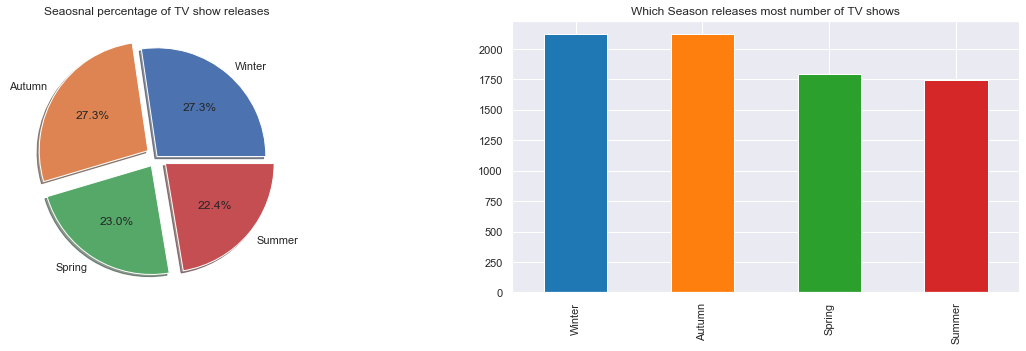

In [28]:
# Seasonsal impact on TV shows
f,ax = plt.subplots(1,2, figsize = (20,5))
netflix_data['Season'].value_counts().plot.pie(ax = ax[0], explode = [0,0.1,0.1,0.1], shadow = True, autopct = '%1.1f%%')
ax[0].set_ylabel(" ")
ax[0].set_title('Seaosnal percentage of TV show releases')

netflix_data['Season'].value_counts().plot(kind = 'bar',color = ['tab:blue','tab:orange','tab:green','tab:red'], ax = ax[1])
ax[1].set_title('Which Season releases most number of TV shows')
sns.set(style = 'darkgrid')
plt.show()

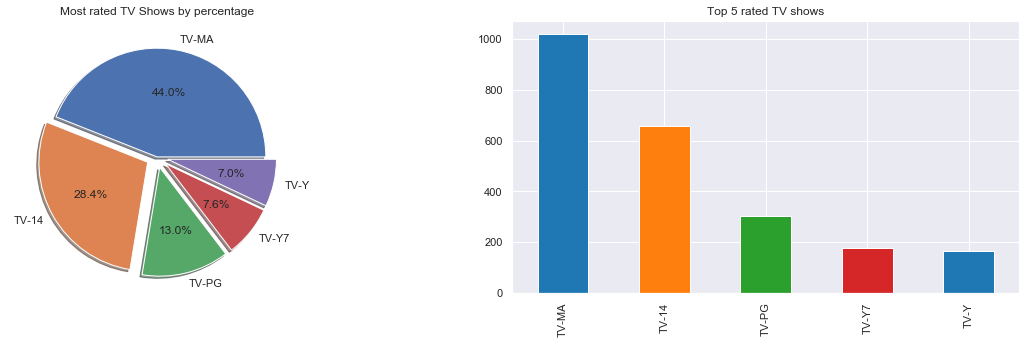

In [29]:
#  Top 5 Overall rating of the TV shows
f,ax = plt.subplots(1,2, figsize = (20,5))
netflix_TV['rating'].value_counts()[:5].plot.pie(ax = ax[0], explode = [0,0.1,0.1,0.1,0.1], shadow = True, autopct = '%1.1f%%')
ax[0].set_ylabel(" ")
ax[0].set_title('Most rated TV Shows by percentage')

netflix_TV['rating'].value_counts()[:5].plot(kind = 'bar',color = ['tab:blue','tab:orange','tab:green','tab:red'], ax = ax[1])
ax[1].set_title('Top 5 rated TV shows')
sns.set(style = 'darkgrid')
plt.show()

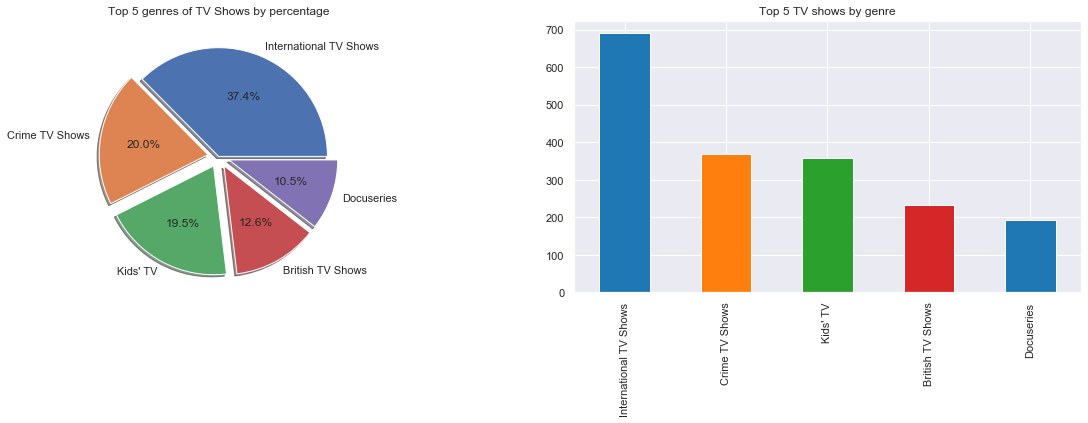

In [30]:
#  Top 5 genres of the TV shows
f,ax = plt.subplots(1,2, figsize = (20,5))
netflix_TV['Genre'].value_counts()[:5].plot.pie(ax = ax[0], explode = [0,0.1,0.1,0.1,0.1], shadow = True, autopct = '%1.1f%%')
ax[0].set_ylabel(" ")
ax[0].set_title('Top 5 genres of TV Shows by percentage')

netflix_TV['Genre'].value_counts()[:5].plot(kind = 'bar',color = ['tab:blue','tab:orange','tab:green','tab:red'], ax = ax[1])
ax[1].set_title('Top 5 TV shows by genre')
sns.set(style = 'darkgrid')
plt.show()

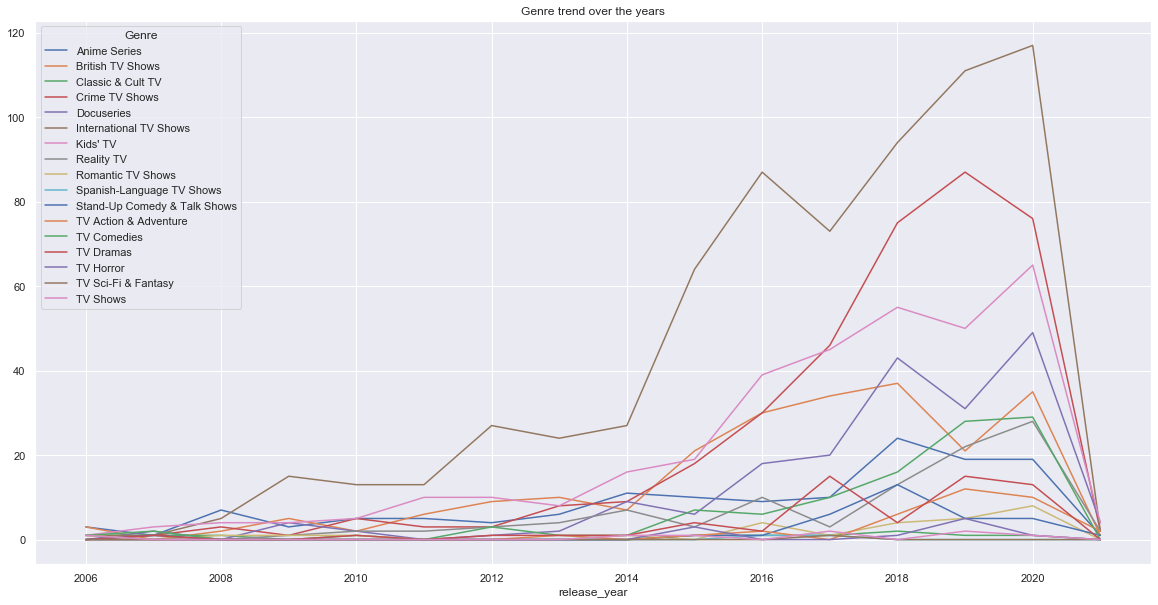

In [31]:
data = pd.crosstab(netflix_TV['release_year'],netflix_TV['Genre'])[30:].plot(kind = 'line', figsize = (20,10))
plt.title("Genre trend over the years")
plt.show()

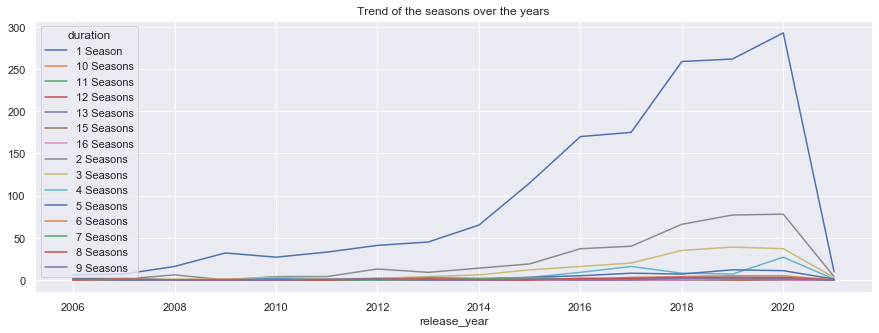

In [32]:
pd.crosstab(netflix_TV['release_year'], netflix_TV['duration'])[30:].plot(kind = 'line', figsize = (15,5))
plt.title('Trend of the seasons over the years')
plt.show()

## Text Analysis on TV shows

In [33]:
import nltk
nltk.download('stopwords')
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LOKESH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LOKESH\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [35]:
# we need to set a index column to the data for text analysis otherwise it will give error
netflix_TV = netflix_TV.reset_index()

In [36]:
netflix_TV.head()

index show_id     type   title              director  \
0      0      s1  TV Show      3%                   NaN   
1      5      s6  TV Show      46           Serdar Akar   
2     11     s12  TV Show    1983                   NaN   
3     12     s13  TV Show    1994  Diego Enrique Osorno   
4     16     s17  TV Show  Feb-09                   NaN   

                                                cast                country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...                 Brazil   
1  Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...                 Turkey   
2  Robert Więckiewicz, Maciej Musiał, Michalina O...  Poland, United States   
3                                                NaN                 Mexico   
4  Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...          United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1       July 1, 2017          2016  TV-MA   1 Season   
2  November 30, 2018          2018  TV-MA   1 Season   
3       May 17, 2019          2019  TV-MA   1 Season   
4     March 20, 2019          2018  TV-14   1 Season   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Dramas   
3  Crime TV Shows, Docuseries, International TV S...   
4                  International TV Shows, TV Dramas   

                                         description initial_release_month  \
0  In a future where the elite inhabit an island ...                August   
1  A genetics professor experiments with a treatm...                  July   
2  In this dark alt-history thriller, a naïve law...              November   
3  Archival video and new interviews examine Mexi...                   May   
4  As a psychology professor faces Alzheimer's, h...                 March   

                    Genre  Season  
0  International TV Shows  Summer  
1  International TV Shows  Summer  
2          Crime TV Shows  Autumn  
3          Crime TV Shows  Spring  
4  International TV Shows  Spring

In [37]:
corpus = []
lemtz = WordNetLemmatizer()

for i in range(0, netflix_TV.shape[0]):
    text = re.sub(pattern= '[^a-zA-Z]', repl= ' ', string= netflix_TV['description'][i])
    text = text.lower()
    text = text.split()
    text = [ words for words in text if words not in set(stopwords.words('english'))]
    text = [lemtz.lemmatize(words)  for words in text]
    text = ' '.join(text)
    corpus.append(text)

In [38]:
corpus[:10]

['future elite inhabit island paradise far crowded slum get one chance join saved squalor',
 'genetics professor experiment treatment comatose sister blend medical shamanic cure unlocks shocking side effect',
 'dark alt history thriller na law student world weary detective uncover conspiracy tyrannized poland decade',
 'archival video new interview examine mexican politics year marked rise ezln assassination luis donaldo colosio',
 'psychology professor face alzheimer daughter three close female friend experience romance marriage heartbreak tragedy',
 'seiya knight zodiac rise protect reincarnation goddess athena dark prophecy hang',
 'docuseries take deep dive lucrative wellness industry tout health healing product live promise',
 'kenya barris family navigate relationship race culture grappling newfound success comedy series',
 'two brother fall two sister quickly realize age difference big ignore',
 'orphan subjected test gave superpower rescued raised istanbul street fall reporter 

In [39]:
netflix_TV['Genre'].value_counts()

International TV Shows          690
Crime TV Shows                  369
Kids' TV                        359
British TV Shows                232
Docuseries                      194
Anime Series                    148
TV Comedies                     110
Reality TV                      102
TV Dramas                        62
TV Action & Adventure            37
Stand-Up Comedy & Talk Shows     33
Romantic TV Shows                28
Classic & Cult TV                21
TV Shows                         12
TV Horror                        10
Spanish-Language TV Shows         2
TV Sci-Fi & Fantasy               1
Name: Genre, dtype: int64

In [40]:
InternationalTV_words = []
CrimeTV_words = []
KidsTV_words = []
BritishTV_words = []
Docuseries_words= []
AnimieTV_words = []
Tvcomedies_words = []
Reality_words = []


for i in list(netflix_TV[netflix_TV['Genre']== "International TV Shows" ].index):
    InternationalTV_words.append(corpus[i])
    
for j in list(netflix_TV[netflix_TV['Genre']== "Crime TV Shows" ].index):
    CrimeTV_words.append(corpus[j])
    

for k in list(netflix_TV[netflix_TV['Genre']== "Kids' TV"  ].index):
    KidsTV_words.append(corpus[k])
    
for p in list(netflix_TV[netflix_TV['Genre']== "British TV Shows" ].index):
    BritishTV_words.append(corpus[p])
    
for q in list(netflix_TV[netflix_TV['Genre']== "Docuseries" ].index):
    Docuseries_words.append(corpus[q])
    
    
for r in list(netflix_TV[netflix_TV['Genre']== "Anime Series" ].index):
    AnimieTV_words.append(corpus[r])
    
for s in list(netflix_TV[netflix_TV['Genre']== "TV Comedies"  ].index):
    Tvcomedies_words.append(corpus[s])
    
    
for t in list(netflix_TV[netflix_TV['Genre']== "Reality TV"].index):    
    Reality_words.append(corpus[t])

In [41]:
Inter = ''
crime = ''
Kids = ''
Britsh = ''
Docu = ''
Anime = ''
Tvcom = ''
Reality = ''

for i in range(0, 9):
    Inter += InternationalTV_words[i]
    crime += CrimeTV_words[i]
    Kids += KidsTV_words[i]
    Britsh+= BritishTV_words[i]
    Docu+= Docuseries_words[i]
    Anime+= AnimieTV_words[i]
    Tvcom+= Tvcomedies_words[i]
    Reality+= Reality_words[i]

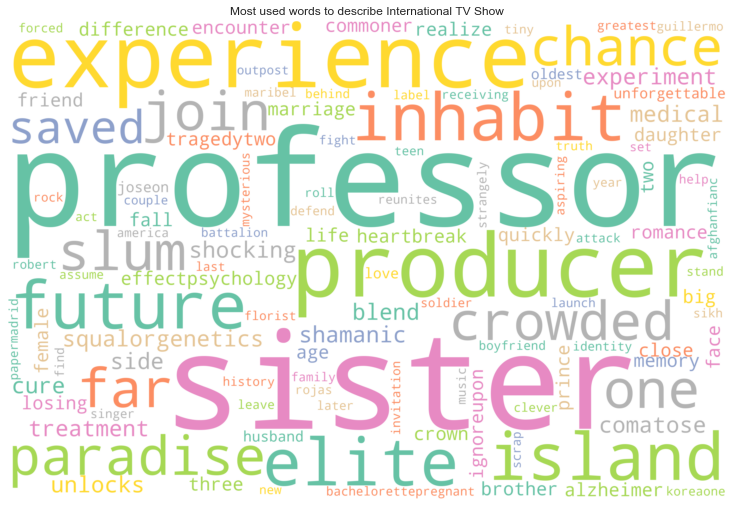

In [42]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image


# mask = np.array(Image.open('D:\\netflix_titles\\netflix.png'))
# maskable_image = np.ndarray((mask.shape[0],mask.shape[1]), np.int32)

# ,mask=maskable_image


wordcloud = WordCloud(width=3000, height=2000, random_state=1, colormap="Set2", background_color="white", collocations=False ).generate(Inter)
plt.figure(figsize=(10,10))
plt.title('Most used words to describe International TV Show')
plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

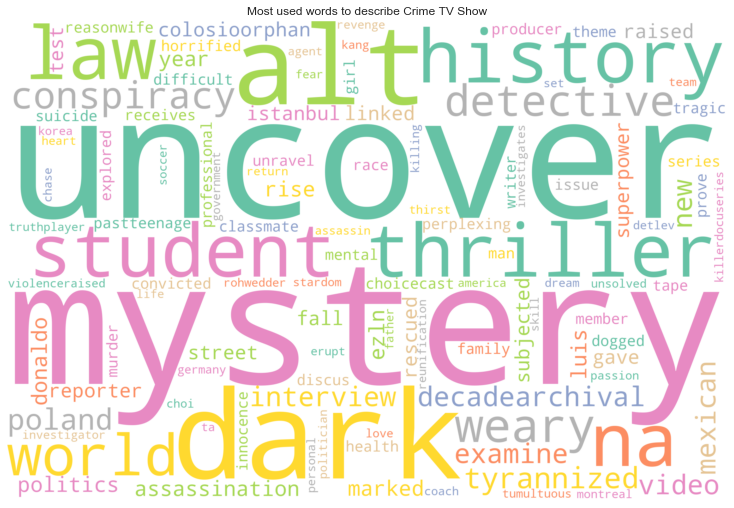

In [43]:
wordcloud = WordCloud(width=3000, height=2000, random_state=1, colormap="Set2", background_color="white", collocations=False ).generate(crime)
plt.figure(figsize=(10,10))
plt.title('Most used words to describe Crime TV Show')
plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

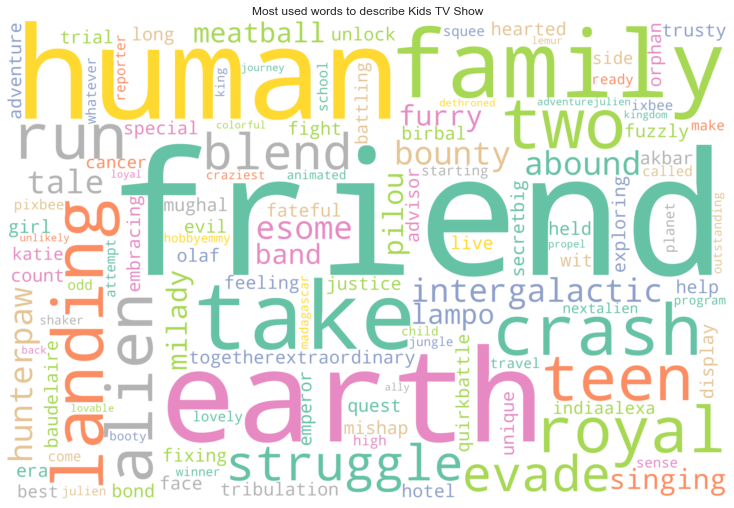

In [44]:
wordcloud = WordCloud(width=3000, height=2000, random_state=1, colormap="Set2", background_color="white", collocations=False ).generate(Kids)
plt.figure(figsize=(10,10))
plt.title('Most used words to describe Kids TV Show')
plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

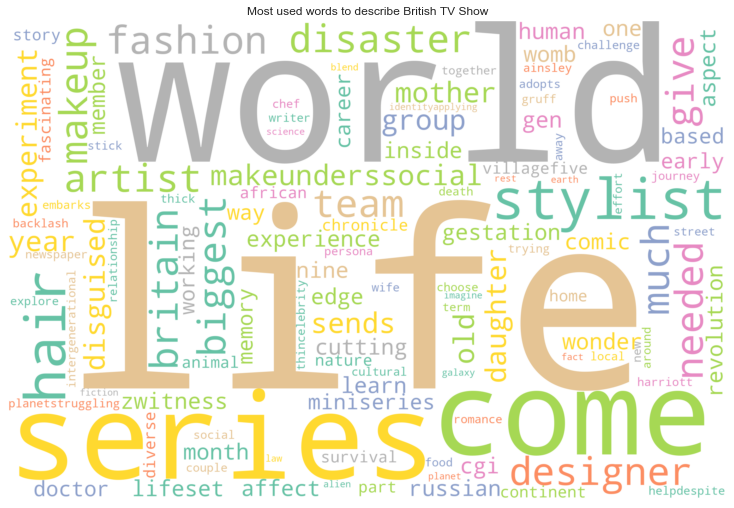

In [45]:
wordcloud = WordCloud(width=3000, height=2000, random_state=1, colormap="Set2", background_color="white", collocations=False ).generate(Britsh)
plt.figure(figsize=(10,10))
plt.title('Most used words to describe British TV Show')
plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

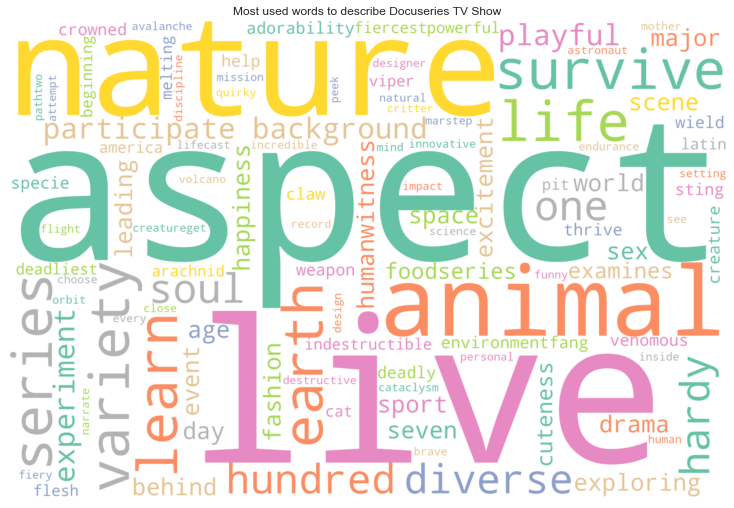

In [46]:
wordcloud = WordCloud(width=3000, height=2000, random_state=1, colormap="Set2", background_color="white", collocations=False ).generate(Docu)
plt.figure(figsize=(10,10))
plt.title('Most used words to describe Docuseries TV Show')
plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

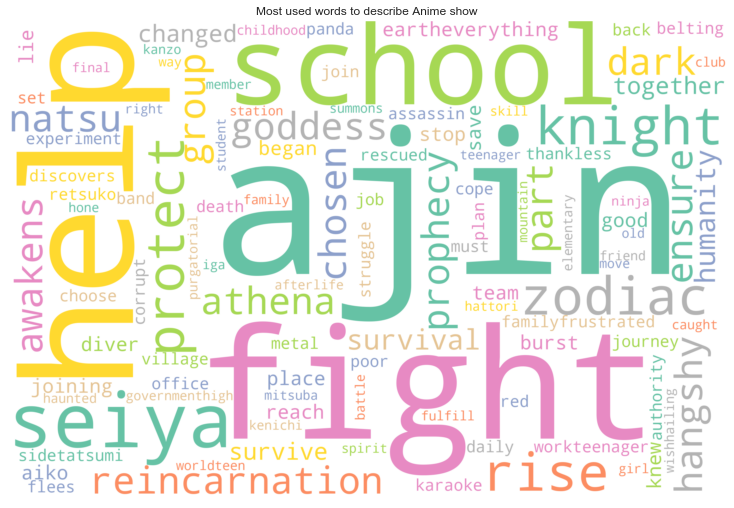

In [47]:
wordcloud = WordCloud(width=3000, height=2000, random_state=1, colormap="Set2", background_color="white", collocations=False ).generate(Anime)
plt.figure(figsize=(10,10))
plt.title('Most used words to describe Anime show')
plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

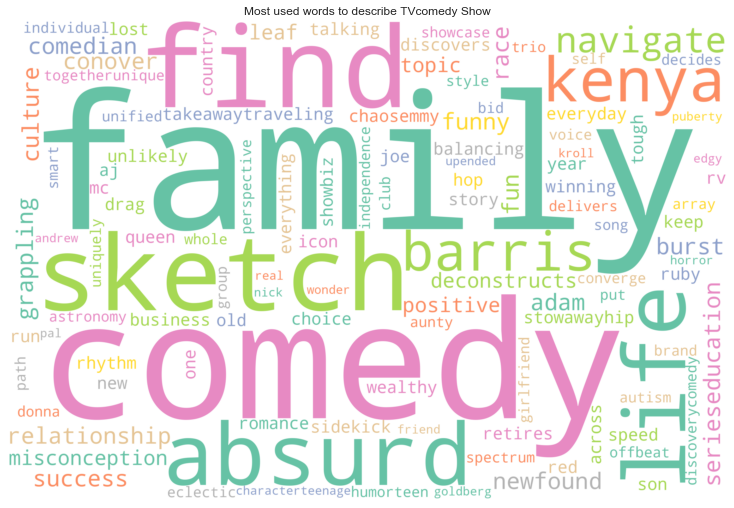

In [48]:
wordcloud = WordCloud(width=3000, height=2000, random_state=1, colormap="Set2", background_color="white", collocations=False ).generate(Tvcom)
plt.figure(figsize=(10,10))
plt.title('Most used words to describe TVcomedy Show')
plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

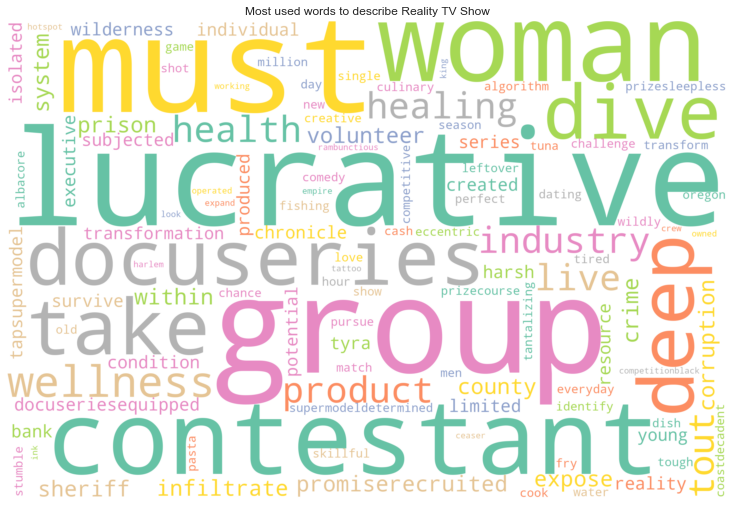

In [49]:
wordcloud = WordCloud(width=3000, height=2000, random_state=1, colormap="Set2", background_color="white", collocations=False ).generate(Reality)
plt.figure(figsize=(10,10))
plt.title('Most used words to describe Reality TV Show')
plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

## Analysis on Movies

In [50]:
netflix_Movie.head(1)

show_id   type title           director  \
1      s2  Movie  7:19  Jorge Michel Grau   

                                                cast country  \
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...  Mexico   

          date_added  release_year rating duration  \
1  December 23, 2016          2016  TV-MA   93 min   

                      listed_in  \
1  Dramas, International Movies   

                                         description initial_release_month  \
1  After a devastating earthquake hits Mexico Cit...              December   

    Genre  Season  
1  Dramas  Winter

In [51]:
netflix_Movie['duration_in_min'] = netflix_Movie['duration'].apply(lambda x : x.split(" ")[0])

In [52]:
netflix_Movie['duration_in_min'].unique()

array(['93', '78', '80', '123', '95', '119', '118', '143', '103', '89',
       '91', '149', '144', '124', '87', '110', '128', '117', '100', '84',
       '99', '90', '102', '104', '105', '56', '125', '81', '97', '106',
       '107', '109', '44', '75', '101', '37', '113', '114', '130', '94',
       '140', '135', '82', '70', '121', '92', '164', '53', '83', '116',
       '86', '120', '96', '126', '129', '77', '137', '148', '28', '122',
       '176', '85', '22', '68', '111', '29', '142', '168', '21', '59',
       '20', '98', '108', '76', '26', '156', '30', '57', '150', '133',
       '115', '154', '127', '146', '136', '88', '131', '24', '112', '74',
       '63', '38', '25', '174', '60', '153', '158', '151', '162', '54',
       '51', '69', '64', '147', '42', '79', '40', '45', '172', '10',
       '163', '55', '72', '61', '71', '160', '171', '48', '139', '157',
       '15', '65', '134', '161', '62', '186', '49', '73', '58', '165',
       '166', '138', '159', '141', '132', '52', '67', '34', '66'

In [53]:
netflix_Movie['duration_in_min']= netflix_Movie['duration_in_min'].astype(np.int64)

In [54]:
netflix_Movie['duration_in_min'].unique()

array([ 93,  78,  80, 123,  95, 119, 118, 143, 103,  89,  91, 149, 144,
       124,  87, 110, 128, 117, 100,  84,  99,  90, 102, 104, 105,  56,
       125,  81,  97, 106, 107, 109,  44,  75, 101,  37, 113, 114, 130,
        94, 140, 135,  82,  70, 121,  92, 164,  53,  83, 116,  86, 120,
        96, 126, 129,  77, 137, 148,  28, 122, 176,  85,  22,  68, 111,
        29, 142, 168,  21,  59,  20,  98, 108,  76,  26, 156,  30,  57,
       150, 133, 115, 154, 127, 146, 136,  88, 131,  24, 112,  74,  63,
        38,  25, 174,  60, 153, 158, 151, 162,  54,  51,  69,  64, 147,
        42,  79,  40,  45, 172,  10, 163,  55,  72,  61,  71, 160, 171,
        48, 139, 157,  15,  65, 134, 161,  62, 186,  49,  73,  58, 165,
       166, 138, 159, 141, 132,  52,  67,  34,  66, 312, 180,  47, 155,
        14, 177,  11,   9,  46, 145,   8,  12,  43,  50,  23, 185, 200,
       169,  27, 170, 196,  33, 181, 204,  32,  35, 167, 179, 193,  13,
       214,  17, 173, 192, 209, 187,  41, 182, 224, 233, 189, 15

In [55]:
netflix_Movie.head(3)

show_id   type  title           director  \
1      s2  Movie   7:19  Jorge Michel Grau   
2      s3  Movie  23:59       Gilbert Chan   
3      s4  Movie      9        Shane Acker   

                                                cast        country  \
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   

          date_added  release_year rating duration  \
1  December 23, 2016          2016  TV-MA   93 min   
2  December 20, 2018          2011      R   78 min   
3  November 16, 2017          2009  PG-13   80 min   

                                           listed_in  \
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   

                                         description initial_release_month  \
1  After a devastating earthquake hits Mexico Cit...              December   
2  When an army recruit is found dead, his fellow...              December   
3  In a postapocalyptic world, rag-doll robots hi...              November   

                Genre  Season  duration_in_min  
1              Dramas  Winter               93  
2       Horror Movies  Winter               78  
3  Action & Adventure  Autumn               80

In [56]:
netflix_Movie.isna().sum()

show_id                    0
type                       0
title                      0
director                 163
cast                     426
country                    0
date_added                 0
release_year               0
rating                     0
duration                   0
listed_in                  0
description                0
initial_release_month      0
Genre                      0
Season                     0
duration_in_min            0
dtype: int64

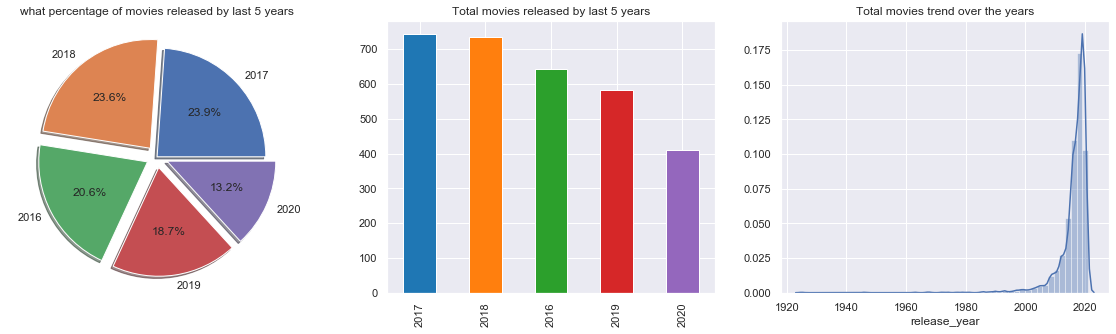

In [57]:
# Most number of movies by last 5 years
f,ax = plt.subplots(1,3, figsize = (20,5))
netflix_Movie['release_year'].value_counts()[:5].plot.pie(ax = ax[0], explode = [0,0.1,0.1,0.1,0.1], shadow = True, autopct = '%1.1f%%')
ax[0].set_ylabel(" ")
ax[0].set_title('what percentage of movies released by last 5 years')
netflix_Movie['release_year'].value_counts()[:5].plot(kind = 'bar',color = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple'], ax = ax[1])
ax[1].set_title('Total movies released by last 5 years')
# sns.countplot(x = 'release_year', data = netflix_TV['release_year'].value_counts()[:5], ax = ax[1])
sns.distplot(netflix_TV['release_year'], ax = ax[2])
ax[2].set_title('Total movies trend over the years')
sns.set(style = 'darkgrid')
plt.show()

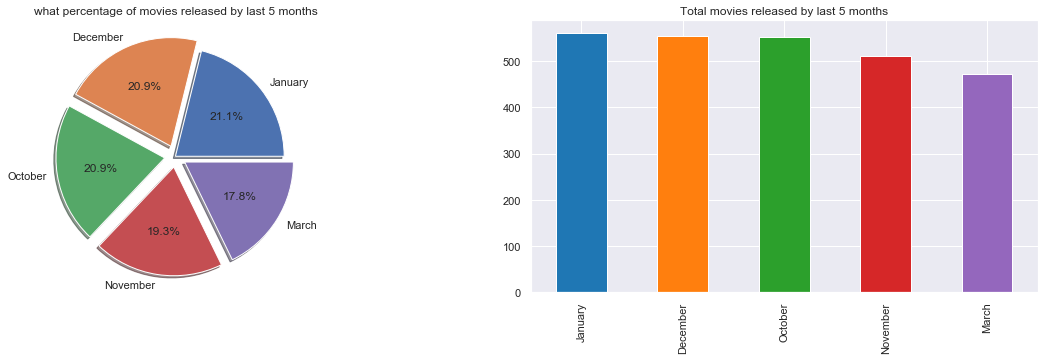

In [58]:
# Most number of movies by last 5 months
f,ax = plt.subplots(1,2, figsize = (20,5))
netflix_Movie['initial_release_month'].value_counts()[:5].plot.pie(ax = ax[0], explode = [0,0.1,0.1,0.1,0.1], shadow = True, autopct = '%1.1f%%')
ax[0].set_ylabel(" ")
ax[0].set_title('what percentage of movies released by last 5 months')
netflix_Movie['initial_release_month'].value_counts()[:5].plot(kind = 'bar',color = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple'], ax = ax[1])
ax[1].set_title('Total movies released by last 5 months')
# sns.countplot(x = 'release_year', data = netflix_TV['release_year'].value_counts()[:5], ax = ax[1])

sns.set(style = 'darkgrid')
plt.show()

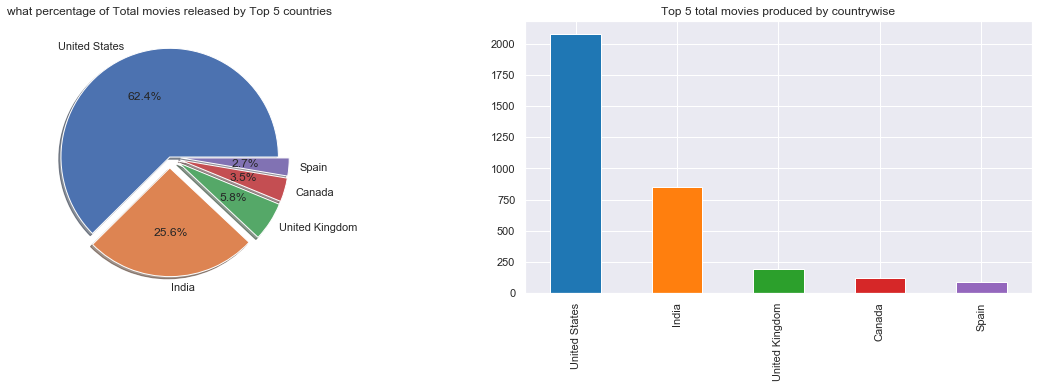

In [59]:
# Top 5 countries which produces Movies
f,ax = plt.subplots(1,2, figsize = (20,5))
netflix_Movie['country'].value_counts()[:5].plot.pie(ax = ax[0], explode = [0,0.1,0.1,0.1,0.1], shadow = True, autopct = '%1.1f%%')
ax[0].set_ylabel(" ")
ax[0].set_title('what percentage of Total movies released by Top 5 countries')
netflix_Movie['country'].value_counts()[:5].plot(kind = 'bar',color = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple'], ax = ax[1])
ax[1].set_title('Top 5 total movies produced by countrywise')
# sns.countplot(x = 'release_year', data = netflix_TV['release_year'].value_counts()[:5], ax = ax[1])

sns.set(style = 'darkgrid')
plt.show()

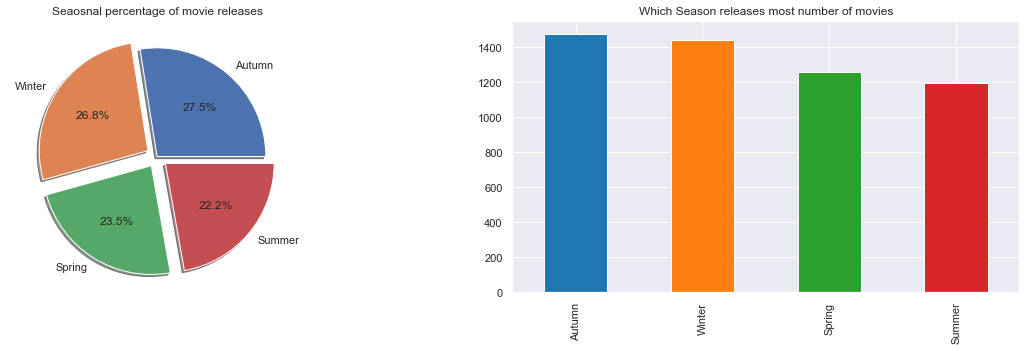

In [60]:
# Seasonsal impact on movies
f,ax = plt.subplots(1,2, figsize = (20,5))
netflix_Movie['Season'].value_counts().plot.pie(ax = ax[0], explode = [0,0.1,0.1,0.1], shadow = True, autopct = '%1.1f%%')
ax[0].set_ylabel(" ")
ax[0].set_title('Seaosnal percentage of movie releases')

netflix_Movie['Season'].value_counts().plot(kind = 'bar',color = ['tab:blue','tab:orange','tab:green','tab:red'], ax = ax[1])
ax[1].set_title('Which Season releases most number of movies')
sns.set(style = 'darkgrid')
plt.show()

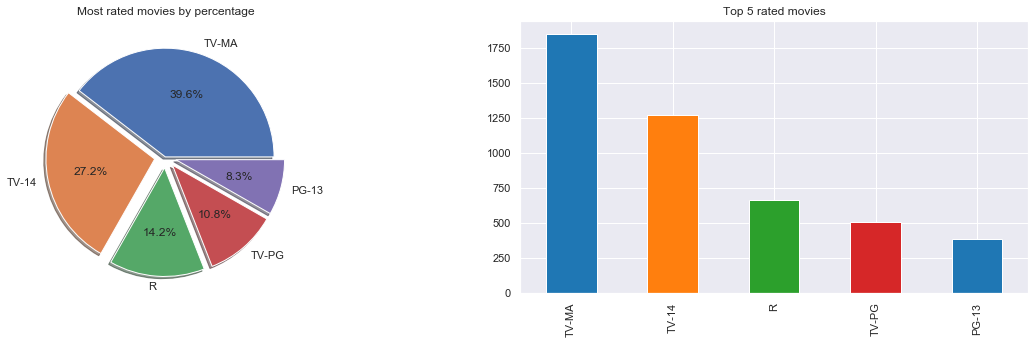

In [61]:
#  Top 5 Overall rating of the Movies
f,ax = plt.subplots(1,2, figsize = (20,5))
netflix_Movie['rating'].value_counts()[:5].plot.pie(ax = ax[0], explode = [0,0.1,0.1,0.1,0.1], shadow = True, autopct = '%1.1f%%')
ax[0].set_ylabel(" ")
ax[0].set_title('Most rated movies by percentage')

netflix_Movie['rating'].value_counts()[:5].plot(kind = 'bar',color = ['tab:blue','tab:orange','tab:green','tab:red'], ax = ax[1])
ax[1].set_title('Top 5 rated movies')
sns.set(style = 'darkgrid')
plt.show()

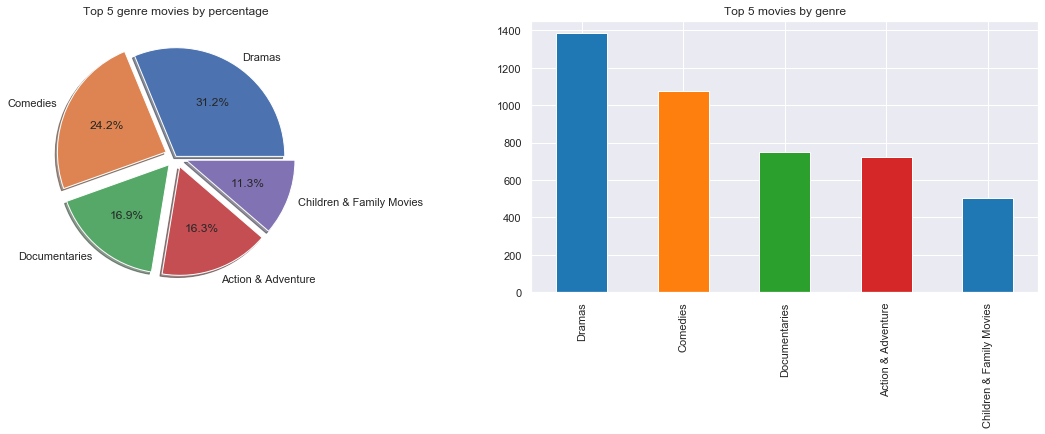

In [62]:
#  Top 5 Genres of the TV shows
f,ax = plt.subplots(1,2, figsize = (20,5))
netflix_Movie['Genre'].value_counts()[:5].plot.pie(ax = ax[0], explode = [0,0.1,0.1,0.1,0.1], shadow = True, autopct = '%1.1f%%')
ax[0].set_ylabel(" ")
ax[0].set_title('Top 5 genre movies by percentage')

netflix_Movie['Genre'].value_counts()[:5].plot(kind = 'bar',color = ['tab:blue','tab:orange','tab:green','tab:red'], ax = ax[1])
ax[1].set_title('Top 5 movies by genre')
sns.set(style = 'darkgrid')
plt.show()

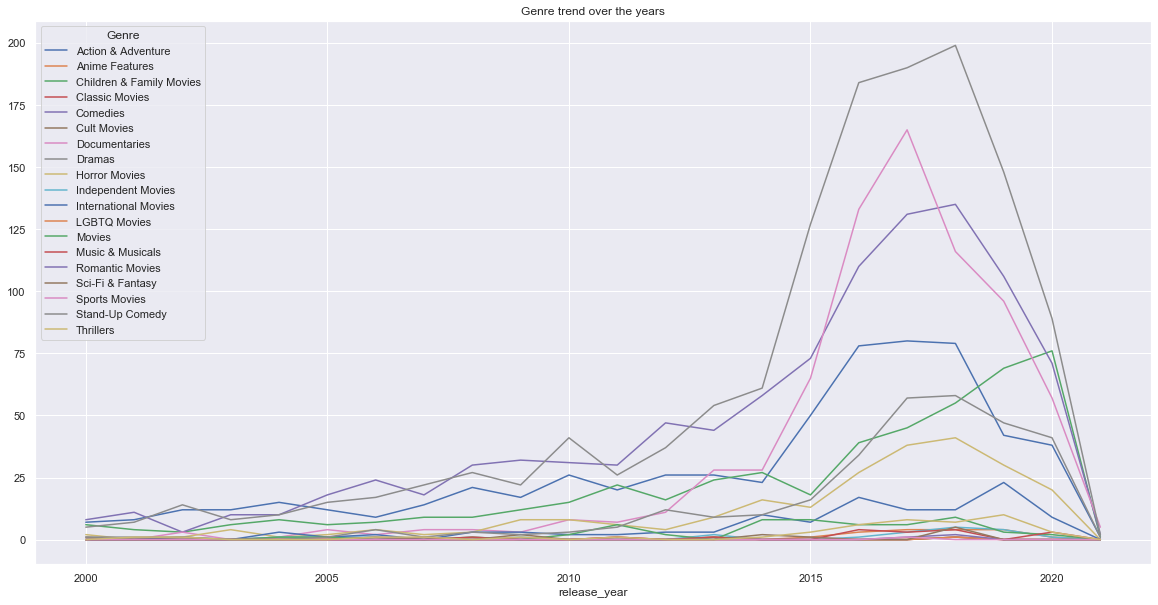

In [63]:
data = pd.crosstab(netflix_Movie['release_year'],netflix_Movie['Genre'])[-22:].plot(kind = 'line', figsize = (20,10))
plt.title("Genre trend over the years")
plt.show()

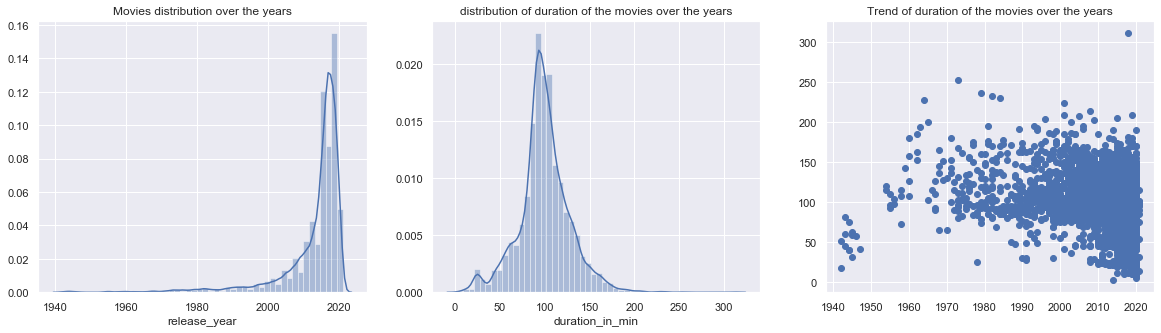

In [64]:
# Most number of movies by last 5 years
f,ax = plt.subplots(1,3, figsize = (20,5))
sns.distplot(netflix_Movie['release_year'], ax = ax[0])
ax[0].set_title('Movies distribution over the years')

sns.distplot(netflix_Movie['duration_in_min'], ax = ax[1])
ax[1].set_title('distribution of duration of the movies over the years')

# sns.relplot(x = 'release_year', y = 'duration_in_min', data = netflix_Movie, kind= 'scatter' , ax = ax[2])
plt.scatter(x = 'release_year', y = 'duration_in_min', data = netflix_Movie )
ax[2].set_title('Trend of duration of the movies over the years')
sns.set(style = 'darkgrid')
plt.show()

## Text Analysis on Movies

In [65]:
# we need to set a index column to the data for text analysis otherwise it will give error
netflix_Movie = netflix_Movie.reset_index()

In [66]:
corpus = []
lemtz = WordNetLemmatizer()

for i in range(0, netflix_Movie.shape[0]):
    text = re.sub(pattern= '[^a-zA-Z]', repl= ' ', string= netflix_Movie['description'][i])
    text = text.lower()
    text = text.split()
    text = [ words for words in text if words not in set(stopwords.words('english'))]
    text = [lemtz.lemmatize(words)  for words in text]
    text = ' '.join(text)
    corpus.append(text)

In [67]:
corpus[:10]

['devastating earthquake hit mexico city trapped survivor walk life wait rescued trying desperately stay alive',
 'army recruit found dead fellow soldier forced confront terrifying secret haunting jungle island training camp',
 'postapocalyptic world rag doll robot hide fear dangerous machine exterminate brave newcomer join group',
 'brilliant group student become card counting expert intent swindling million la vega casino playing blackjack',
 'awful accident couple admitted grisly hospital separated must find escape death find',
 'one high school student attack dedicated teacher trevor garfield grows weary gang warfare new york city school system move california teach thinking must le hostile environment',
 'doctor go missing psychiatrist wife treat bizarre medical condition psychic patient know much leading',
 'architect wife move castle slated become luxury hotel something inside determined stop renovation',
 'farmer pen confession admitting wife murder death beginning macabre tale

In [68]:
netflix_Movie['Genre'].value_counts()

Dramas                      1384
Comedies                    1074
Documentaries                751
Action & Adventure           721
Children & Family Movies     502
Stand-Up Comedy              321
Horror Movies                244
International Movies         114
Classic Movies                77
Movies                        56
Thrillers                     49
Independent Movies            20
Anime Features                19
Music & Musicals              17
Cult Movies                   12
Sci-Fi & Fantasy              11
Romantic Movies                3
LGBTQ Movies                   1
Sports Movies                  1
Name: Genre, dtype: int64

In [69]:
dramas_words = []
comidies_words = []
document_words = []
action_words = []
children_words= []
standupcom_words = []
horror_words = []
international_words = []


for i in list(netflix_Movie[netflix_Movie['Genre']== "Dramas" ].index):
    dramas_words.append(corpus[i])
    
for j in list(netflix_Movie[netflix_Movie['Genre']== "Comedies" ].index):
    comidies_words.append(corpus[j])
    

for k in list(netflix_Movie[netflix_Movie['Genre']== "Documentaries"  ].index):
    document_words.append(corpus[k])
    
for p in list(netflix_Movie[netflix_Movie['Genre']== "Action & Adventure" ].index):
    action_words.append(corpus[p])
    
for q in list(netflix_Movie[netflix_Movie['Genre']== "Children & Family Movies" ].index):
    children_words.append(corpus[q])
    
    
for r in list(netflix_Movie[netflix_Movie['Genre']== "Stand-Up Comedy" ].index):
    standupcom_words.append(corpus[r])
    
for s in list(netflix_Movie[netflix_Movie['Genre']== "Horror Movies"  ].index):
    horror_words.append(corpus[s])
    
    
for t in list(netflix_Movie[netflix_Movie['Genre']== "International Movies"].index):    
    international_words.append(corpus[t])

In [70]:
dramas = ''
comidies = ''
document = ''
action = ''
children = ''
standupcom = ''
horror = ''
international = ''

for i in range(0, 9):
    dramas += dramas_words[i]
    comidies += comidies_words[i]
    document += document_words[i]
    action+= action_words[i]
    children+= children_words[i]
    standupcom+= standupcom_words[i]
    horror+= horror_words[i]
    international+= international_words[i]

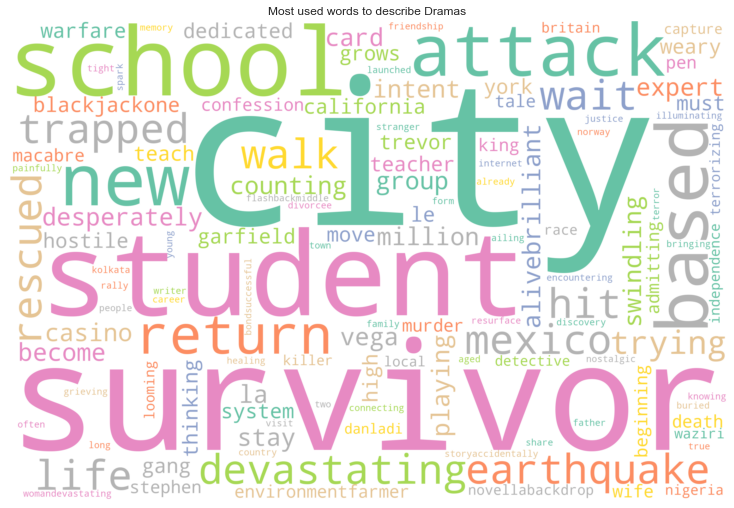

In [71]:
wordcloud = WordCloud(width=3000, height=2000, random_state=1, colormap="Set2", background_color="white", collocations=False ).generate(dramas)
plt.figure(figsize=(10,10))
plt.title('Most used words to describe Dramas')
plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

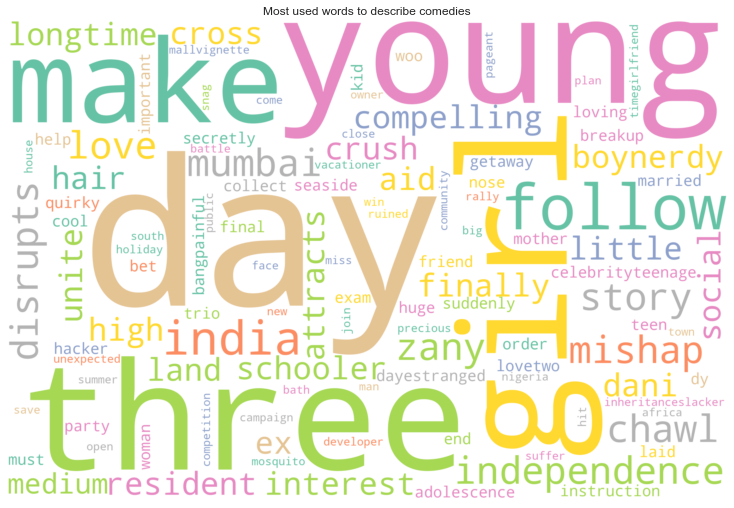

In [72]:
wordcloud = WordCloud(width=3000, height=2000, random_state=1, colormap="Set2", background_color="white", collocations=False ).generate(comidies)
plt.figure(figsize=(10,10))
plt.title('Most used words to describe comedies')
plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

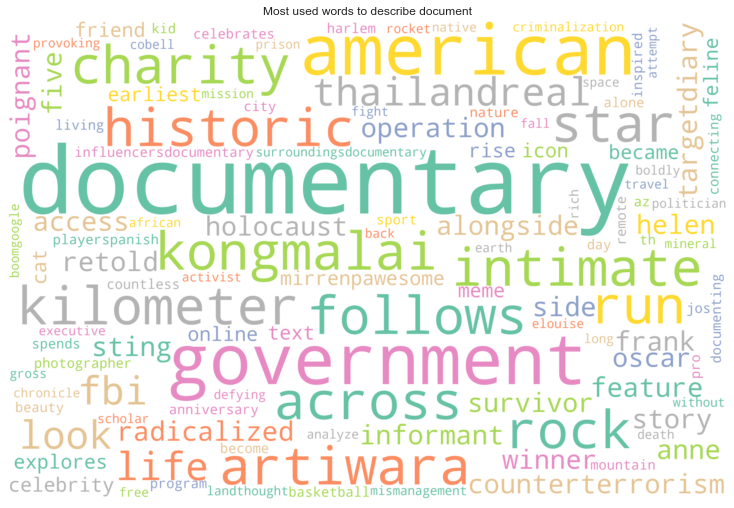

In [73]:
wordcloud = WordCloud(width=3000, height=2000, random_state=1, colormap="Set2", background_color="white", collocations=False ).generate(document)
plt.figure(figsize=(10,10))
plt.title('Most used words to describe document')
plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

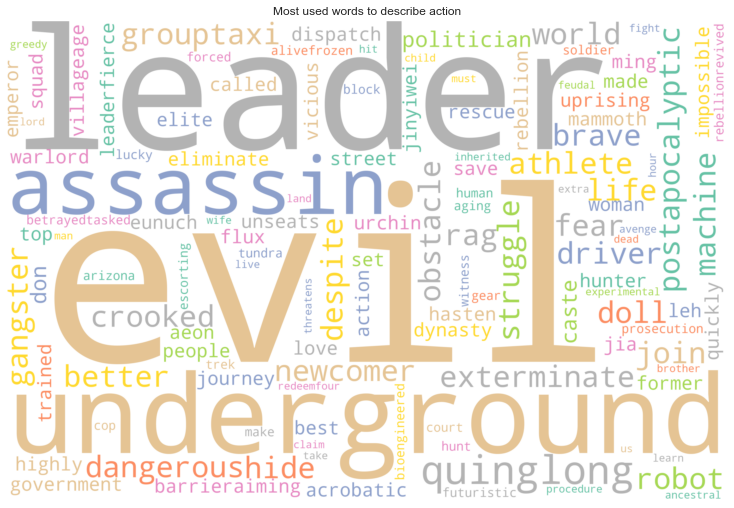

In [74]:
wordcloud = WordCloud(width=3000, height=2000, random_state=1, colormap="Set2", background_color="white", collocations=False ).generate(action)
plt.figure(figsize=(10,10))
plt.title('Most used words to describe action')
plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

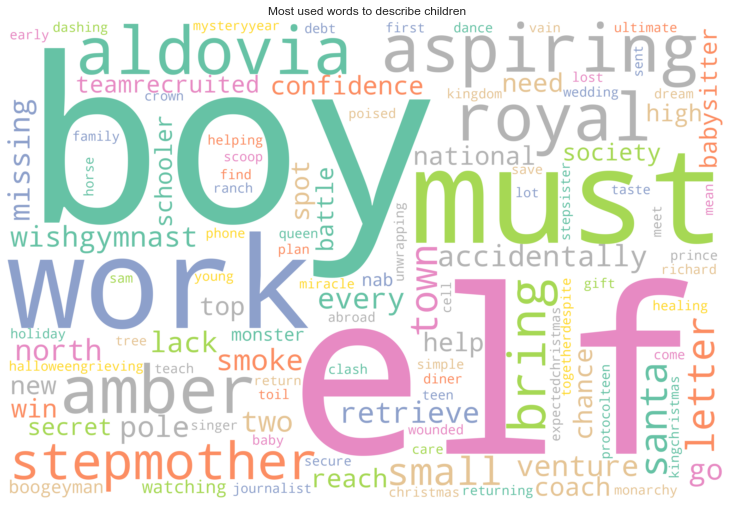

In [75]:
wordcloud = WordCloud(width=3000, height=2000, random_state=1, colormap="Set2", background_color="white", collocations=False ).generate(children)
plt.figure(figsize=(10,10))
plt.title('Most used words to describe children')
plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

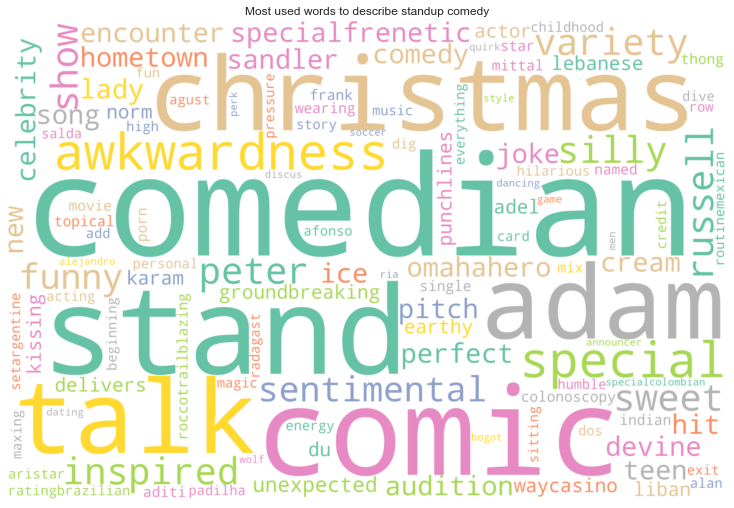

In [76]:
wordcloud = WordCloud(width=3000, height=2000, random_state=1, colormap="Set2", background_color="white", collocations=False ).generate(standupcom)
plt.figure(figsize=(10,10))
plt.title('Most used words to describe standup comedy')
plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

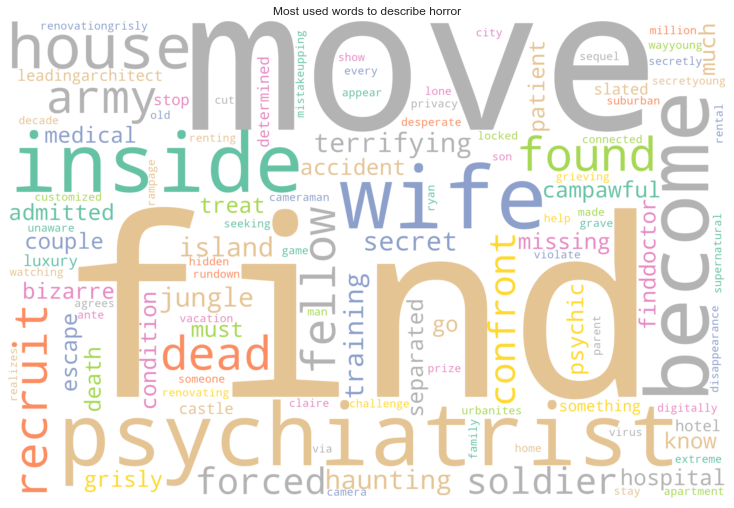

In [77]:
wordcloud = WordCloud(width=3000, height=2000, random_state=1, colormap="Set2", background_color="white", collocations=False ).generate(horror)
plt.figure(figsize=(10,10))
plt.title('Most used words to describe horror')
plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

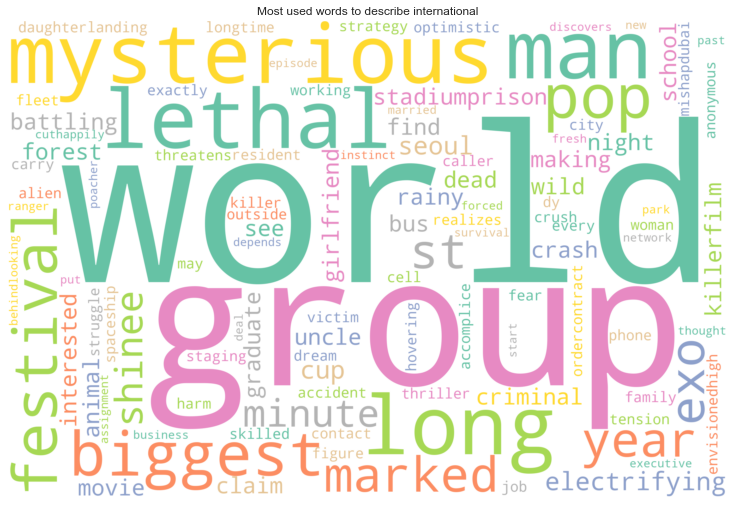

In [78]:
wordcloud = WordCloud(width=3000, height=2000, random_state=1, colormap="Set2", background_color="white", collocations=False ).generate(international)
plt.figure(figsize=(10,10))
plt.title('Most used words to describe international')
plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()